# Data Exploration
This notebook aims to describe the distribution of a variety of statistics about music that we computed using the function described in statistics.ipynb.



## Data preparation

In [1]:
# Import the file containing the midi statistics
import pandas as pd

# Import file without index column
statistics = pd.read_csv("../data/statistics_with_genre_clean.csv", index_col=1)
statistics.drop(columns=["Unnamed: 0"], inplace=True)
statistics.head()

,n_instruments,n_unique_instruments,instruments,instrument_families,number_of_instrument_families,n_notes,n_unique_notes,average_n_unique_notes_per_instrument,average_note_duration,average_note_velocity,...,n_key_changes,n_tempo_changes,tempo_estimate,main_time_signature,n_time_signature_changes,track_length_in_seconds,lyrics_nb_words,lyrics_unique_words,lyrics_bool,genre_discogs
md5,,,,,,,,,,,,,,,,,,,,,
ac45c832a78728aa8822a3df637682c3,14,13,"0, 88, 96, 80, 48, 4, 11, 26, 39, 49, 52, 69, ...","Synth Pad, Guitar, Bass, Synth Effects, Chroma...",10,3643,58,11.214286,0.605142,83.446884,...,1,4,243,4/4,1,221,223,95,True,electronic
ac547baef487103fd9de9f49d2f6e204,15,12,"81, 0, 61, 33, 52, 48, 48, 117, 57, 95, 75, 72...","Piano, Ensemble, Brass, Organ, Percussive, Syn...",9,8167,55,8.200000,0.109172,69.641606,...,1,1,226,1/4,2,264,0,0,False,electronic
a861dcbbbcece2ba042648c20d3425a8,10,10,"25, 82, 18, 0, 35, 27, 26, 4, 31, 30","Piano, Synth Lead, Bass, Guitar, Organ",5,7691,47,13.600000,0.535591,92.886231,...,1,1,194,4/4,1,305,534,176,True,rock
a077f8d661f6853d92f47c2e08b723b9,5,5,"48, 33, 26, 30, 0","Piano, Bass, Guitar, Ensemble",4,3386,30,7.800000,0.378581,95.000000,...,1,1,219,4/4,1,257,0,0,False,rock
aa42e141c3e3ff1f46e9bc676ca61ebb,2,2,"85, 91","Synth Lead, Synth Pad",2,3290,33,33.000000,0.123359,92.096657,...,1,5,249,3/4,1,201,0,0,False,classical


<AxesSubplot: >

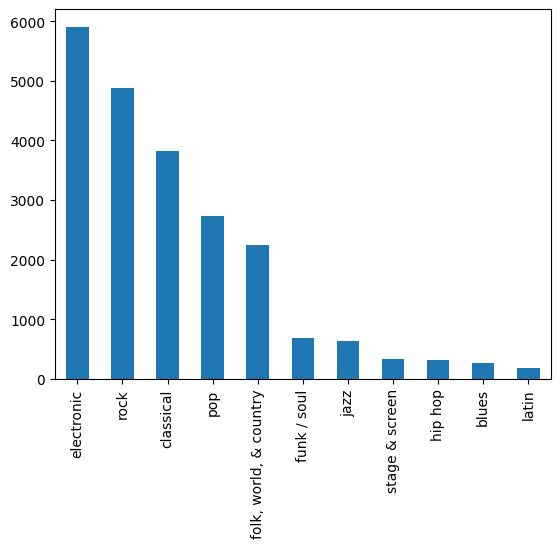

In [2]:
# Count the number of songs per genre
songs_per_genre = statistics["genre_discogs"].value_counts()

# Remove the genres with less than 100 songs
genre_to_remove = songs_per_genre[songs_per_genre < 100].index

# Filter out the songs with the genres to remove
f_stats = statistics[~statistics["genre_discogs"].isin(genre_to_remove)]

# Plot the number of songs per genre
f_stats["genre_discogs"].value_counts().plot(kind="bar")

In [3]:
# Turn the instrument numbers into intrument names for easier reading
import pretty_midi

# Get the instruments, split into list and explode the df
statistics_instruments = f_stats["instruments"].str.split(", ").explode()

# Turn instrument numbers into instrument names
statistics_instruments = statistics_instruments.apply(lambda x: pretty_midi.program_to_instrument_name(int(x)))

display(statistics_instruments.head())

md5
ac45c832a78728aa8822a3df637682c3    Acoustic Grand Piano
ac45c832a78728aa8822a3df637682c3         Pad 1 (new age)
ac45c832a78728aa8822a3df637682c3             FX 1 (rain)
ac45c832a78728aa8822a3df637682c3         Lead 1 (square)
ac45c832a78728aa8822a3df637682c3       String Ensemble 1
Name: instruments, dtype: object

# Instruments

<AxesSubplot: >

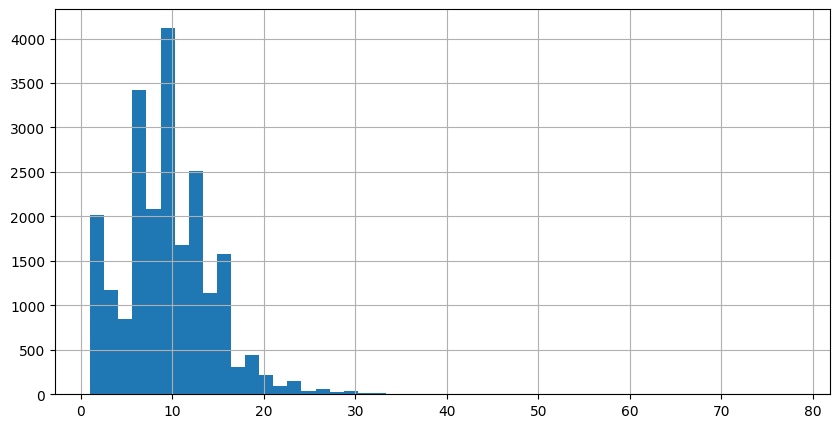

In [146]:
# plot a histogram of the number of instruments per song
f_stats['n_instruments'].hist(bins=50, figsize=(10, 5))

array([<AxesSubplot: title={'center': 'n_instruments'}, xlabel='genre_discogs'>,
       <AxesSubplot: title={'center': 'n_unique_instruments'}, xlabel='genre_discogs'>],
      dtype=object)

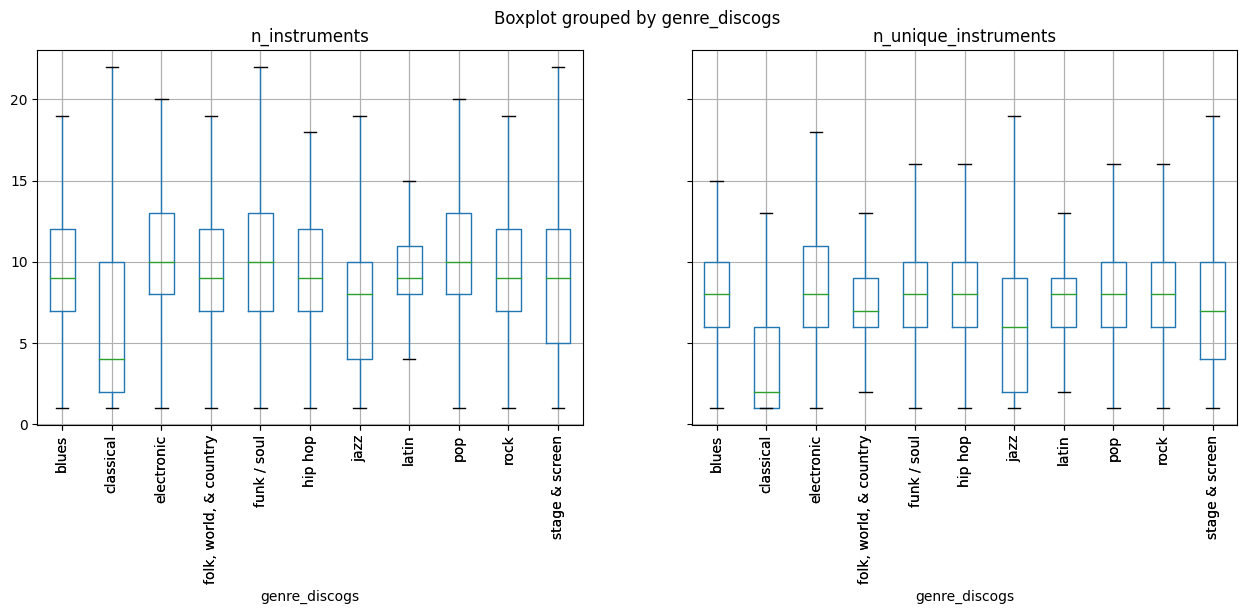

In [4]:
# Plot the distribution of the number of instruments per genre without outliers, sorted by average
f_stats.boxplot(column=["n_instruments", 'n_unique_instruments'], by="genre_discogs", showfliers=False, rot=90,figsize=(15,5))

/var/folders/wq/rbk3t8096wx4j9pwnkrfzcwm0000gn/T/ipykernel_40574/2554132853.py:5: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  median_inst_per_genre.plot(kind="bar", sort_columns=True)


<AxesSubplot: xlabel='genre_discogs'>

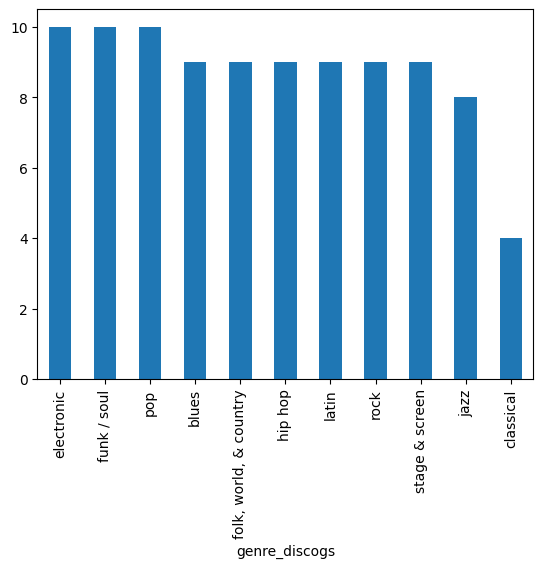

In [5]:
# Calculate the median number of instruments per genre
median_inst_per_genre = f_stats.groupby("genre_discogs")["n_instruments"].median().sort_values(ascending=False)

# Plot the distribution of instruments
median_inst_per_genre.plot(kind="bar", sort_columns=True)

In [6]:
# Prevent pandas from displaying errors
pd.options.mode.chained_assignment = None

# Extract the instrument families, explode the dataframe
f_stats["instrument_families"] = f_stats["instrument_families"].str.split(", ", expand=False)
f_stats_exploded = f_stats.explode("instrument_families")


In [7]:
# Prevent from displaying FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Count the number of instrument families per genre
inst_fam_per_genre = f_stats_exploded.groupby("genre_discogs")["instrument_families"].value_counts().reset_index(name="count")

# Get the top 5 instrument families per genre
top_5_inst_fam_per_genre = inst_fam_per_genre.groupby("genre_discogs").head(5)

# Express the count as a percentage of the total number of instrument families per genre
top_5_inst_fam_per_genre["percentage"] = top_5_inst_fam_per_genre.groupby("genre_discogs")["count"].apply(lambda x: x * 100 // x.sum())

# plot the top 5 instrument families per genre as a percentage using plotly
import plotly.express as px

fig = px.bar(top_5_inst_fam_per_genre, x="genre_discogs", y="percentage", color="instrument_families", barmode="stack")
fig.show()

In [14]:
# Get top 5 instruments per genre

# Display the entire dataframe
pd.set_option('display.max_rows', None)

# Merge the genre and instruments
statistics_instruments_merged = statistics_instruments.reset_index()
statistics_instruments_merged = statistics_instruments_merged.merge(statistics["genre_discogs"], left_on="md5", right_index=True)

# Count the number of instruments per genre
inst_per_genre = statistics_instruments_merged.groupby("genre_discogs")["instruments"].value_counts().reset_index(name="count")

# Keep the top 5 instruments per genre
top_5_inst_per_genre = inst_per_genre.groupby("genre_discogs").head(5)

# Express the count as a percentage of the total number of instruments per genre
top_5_inst_per_genre["percentage"] = top_5_inst_per_genre.groupby("genre_discogs")["count"].apply(lambda x: x * 100 / x.sum())

# plot the top 5 instruments per genre as a percentage using plotly
fig = px.bar(top_5_inst_per_genre, x="genre_discogs", y="percentage", color="instruments", barmode="stack")
fig.show()


## Notes

<AxesSubplot: xlabel='genre_discogs'>

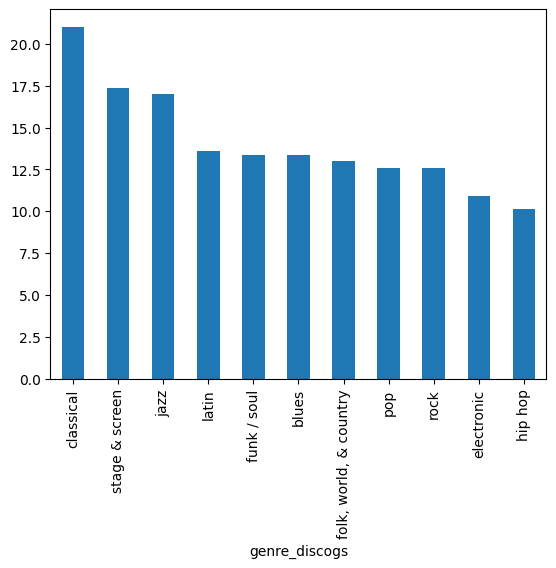

In [28]:
# Calculate the median average unique notes per instrument per genre
median_notes_per_genre = f_stats.groupby("genre_discogs")["average_n_unique_notes_per_instrument"].median().sort_values(ascending=False)

# Plot
median_notes_per_genre.plot(kind="bar", sort_columns=True)

<AxesSubplot: >

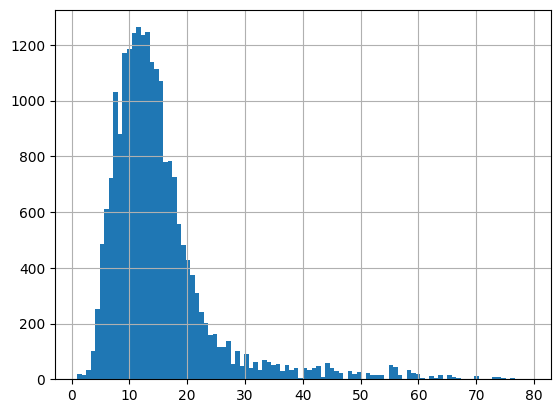

In [29]:
# Plot the histogram of the average number of notes per instruments
f_stats["average_n_unique_notes_per_instrument"].hist(bins=100)

<AxesSubplot: xlabel='genre_discogs'>

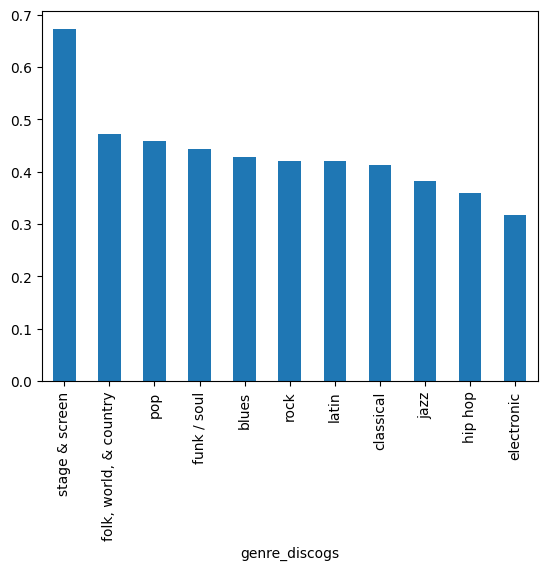

In [40]:
# Calculate the average note duration
median_notes_per_genre = f_stats.groupby("genre_discogs")['average_note_duration'].median().sort_values(ascending=False)

# Plot
median_notes_per_genre.plot(kind="bar", sort_columns=True)

<AxesSubplot: >

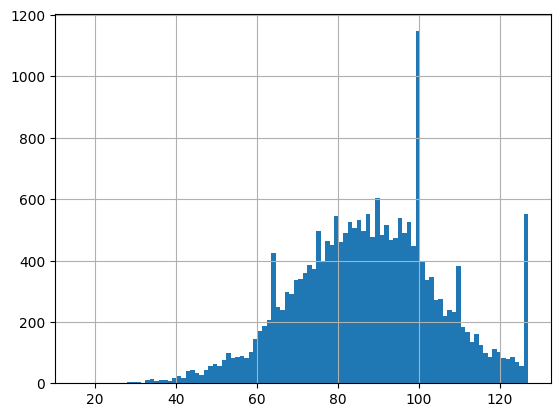

In [45]:
# Plot distribution of the average note velocity
f_stats['average_note_velocity'].hist(bins=100)

<AxesSubplot: >

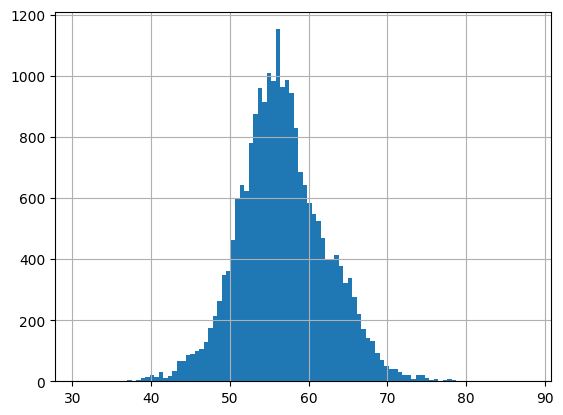

In [49]:
# Plot distribution of the average note pitch
f_stats['average_note_pitch'].hist(bins=100)

<AxesSubplot: >

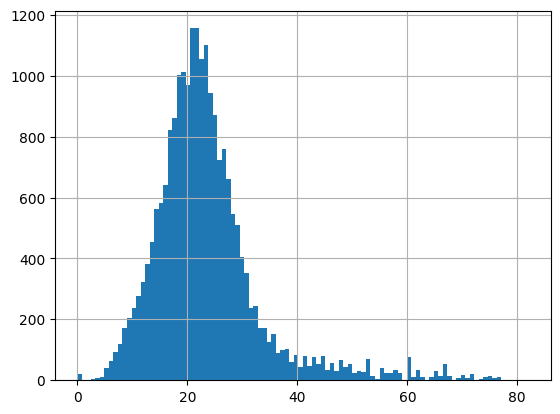

In [56]:
# Plot distribution of the average range of note pitches
f_stats['average_range_of_note_pitches_per_instrument'].hist(bins=100)

<AxesSubplot: xlabel='genre_discogs'>

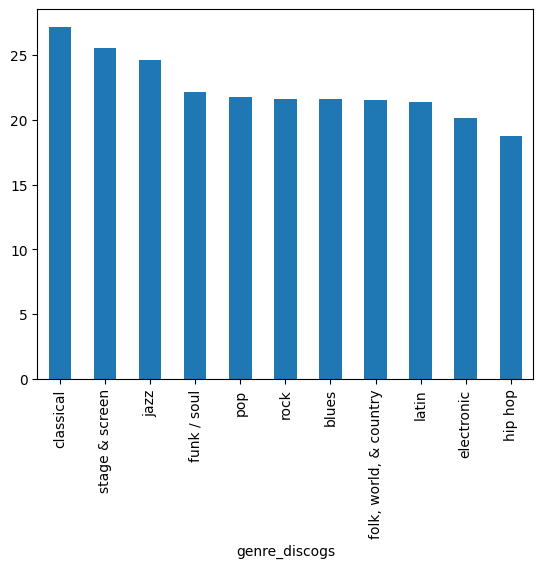

In [57]:
# Calculate the median average unique notes per instrument per genre
median_notes_per_genre = f_stats.groupby("genre_discogs")['average_range_of_note_pitches_per_instrument'].median().sort_values(ascending=False)

# Plot
median_notes_per_genre.plot(kind="bar", sort_columns=True)

<AxesSubplot: >

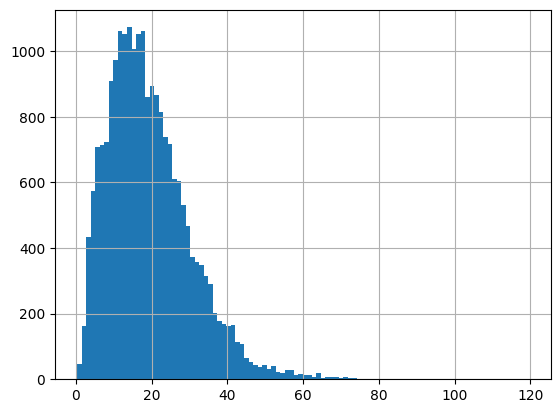

In [75]:
# Plot distribution of the average number of notes per second
f_stats['number_of_notes_per_second'].hist(bins=100)

<AxesSubplot: xlabel='genre_discogs'>

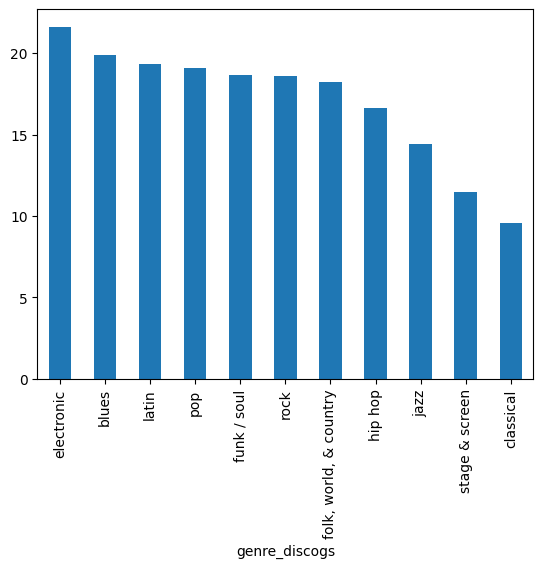

In [76]:
# Calculate the median average unique notes per instrument per genre
median_notes_per_genre = f_stats.groupby("genre_discogs")['number_of_notes_per_second'].median().sort_values(ascending=False)

# Plot
median_notes_per_genre.plot(kind="bar", sort_columns=True)

## Other statistics

<AxesSubplot: >

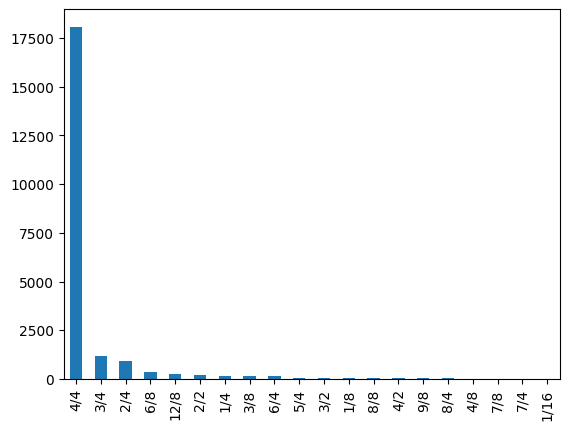

In [108]:
# Plot 20 most common time signatures
f_stats['main_time_signature'].value_counts().head(20).plot(kind="bar", sort_columns=True)

In [110]:
# Get number of songs that have 4/4 as main time signature
f_stats['main_time_signature'].value_counts().head(1) / f_stats['main_time_signature'].value_counts().sum()

4/4    0.821697
Name: main_time_signature, dtype: float64

In [115]:
# Get number of songs that never change time signature
f_stats['n_time_signature_changes'].value_counts().head(1) / f_stats['n_time_signature_changes'].value_counts().sum()

1    0.811417
Name: n_time_signature_changes, dtype: float64

<AxesSubplot: >

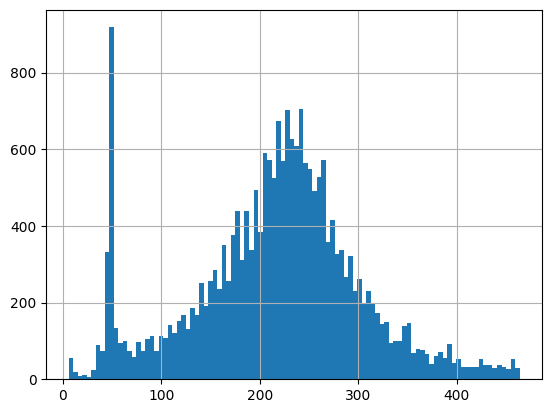

In [119]:
# Plot distribution of the track length in seconds
f_stats['track_length_in_seconds'].hist(bins=100)

In [134]:
# Count the number of songs with lyrics per genre
lyrics_per_genre = f_stats.groupby("genre_discogs")['lyrics_bool'].value_counts().reset_index(name="count")

# Express the count as a percentage of the total number of songs per genre
lyrics_per_genre["percentage"] = lyrics_per_genre.groupby("genre_discogs")["count"].apply(lambda x: x * 100 / x.sum())

# Plot the number of songs with lyrics per genre
fig = px.bar(lyrics_per_genre, x="genre_discogs", y="percentage", color='lyrics_bool')
fig.show()
